In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Year 2009

In [2]:
#Importing the data frame

df = pd.read_csv("hospital-profitability-2009-2013-.csv")
print(df.head(5))

   Year  Facility Number     Facility Name  Begin Date    End Date  \
0  2009      106010735.0  ALAMEDA HOSPITAL  07/01/2008  06/30/2009   
1  2009      106010735.0  ALAMEDA HOSPITAL  07/01/2008  06/30/2009   
2  2009      106010735.0  ALAMEDA HOSPITAL  07/01/2008  06/30/2009   
3  2009      106010735.0  ALAMEDA HOSPITAL  07/01/2008  06/30/2009   
4  2009      106010735.0  ALAMEDA HOSPITAL  07/01/2008  06/30/2009   

  County Name Type of Control Income Statement Item  Income Statement Amount  \
0     Alameda        District             GR_PT_REV              282813469.0   
1     Alameda        District      DED_REV_PLUS_DSH              219753983.0   
2     Alameda        District           TOT_CAP_REV                      0.0   
3     Alameda        District      NET_REV_LESS_DSH               63059486.0   
4     Alameda        District            OTH_OP_REV                 192252.0   

   Amount per Adjusted Patient Day  
0                           5220.0  
1                       

In [17]:
df_2009 = pd.read_csv("hospital-profitability (2009).csv")
df_2009

,Year,Facility Number,Facility Name,Begin Date,End Date,County Name,Type of Control,Income Statement Item,Income Statement Amount,Amount per Adjusted Patient Day
0,2009,106431013.0,AGNEWS STATE HOSPITAL,7/1/2008,6/30/2009,Santa Clara,State,GR_PT_REV,4.659113e+07,2005.0
1,2009,106431013.0,AGNEWS STATE HOSPITAL,7/1/2008,6/30/2009,Santa Clara,State,DED_REV_PLUS_DSH,2.418315e+06,104.0
2,2009,106431013.0,AGNEWS STATE HOSPITAL,7/1/2008,6/30/2009,Santa Clara,State,TOT_CAP_REV,0.000000e+00,0.0
3,2009,106431013.0,AGNEWS STATE HOSPITAL,7/1/2008,6/30/2009,Santa Clara,State,NET_REV_LESS_DSH,4.417281e+07,1901.0
4,2009,106431013.0,AGNEWS STATE HOSPITAL,7/1/2008,6/30/2009,Santa Clara,State,OTH_OP_REV,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...
5793,2009,NaN,NaN,NaN,NaN,Statewide,NaN,NONOP_EXP,8.035614e+08,26.0
5794,2009,NaN,NaN,NaN,NaN,Statewide,NaN,INC_TAX,2.701878e+07,1.0
5795,2009,NaN,NaN,NaN,NaN,Statewide,NaN,EXT_ITEM,1.070080e+07,0.0
5796,2009,NaN,NaN,NaN,NaN,Statewide,NaN,NET_INC_LESS_DSH,2.540832e+09,83.0


In [4]:
# Find number of rows of statewide data

statewide_2009 = df_2009.loc[df_2009["County Name"] == "Statewide"]
len(statewide_2009)

13

In [5]:
# Find last row index before statewide data

diff_2009 = len(df_2009[:]) - len(statewide_2009) - 1
diff_2009

5784

In [6]:
mod_df_2009 = df_2009.loc[:diff_2009, ["County Name", "Income Statement Item", "Income Statement Amount"]]
mod_df_2009

,County Name,Income Statement Item,Income Statement Amount
0,Alameda,GR_PT_REV,2.828135e+08
1,Alameda,DED_REV_PLUS_DSH,2.197540e+08
2,Alameda,TOT_CAP_REV,0.000000e+00
3,Alameda,NET_REV_LESS_DSH,6.305949e+07
4,Alameda,OTH_OP_REV,1.922520e+05
...,...,...,...
5780,Yuba,NONOP_EXP,1.072346e+06
5781,Yuba,INC_TAX,0.000000e+00
5782,Yuba,EXT_ITEM,0.000000e+00
5783,Yuba,NET_INC_LESS_DSH,-1.091562e+07


In [7]:
print(mod_df_2009.groupby(["Income Statement Item"]).sum(numeric_only = True))

                       Income Statement Amount
Income Statement Item                         
DED_REV_PLUS_DSH                  1.914680e+11
EXT_ITEM                          1.070080e+07
GR_PT_REV                         2.550024e+11
INC_TAX                           2.701878e+07
NET_INC_LESS_DSH                  2.540832e+09
NET_OP_LESS_DSH                   4.279938e+08
NET_REV_LESS_DSH                  6.610515e+10
NONOP_EXP                         8.035614e+08
NONOP_REV                         2.954119e+09
OPERATING_MARGIN                 -2.161030e+03
OTH_OP_REV                        2.215687e+09
TOT_CAP_REV                       2.570711e+09
TOT_OP_EXP                        6.789284e+10


In [8]:
mod_df_2009 = mod_df_2009.groupby(["Income Statement Item"]).sum(numeric_only = True)

rev_deduct = mod_df_2009.loc["DED_REV_PLUS_DSH", "Income Statement Amount"]
extra_item = mod_df_2009.loc["EXT_ITEM", "Income Statement Amount"]
gross_pat_rev = mod_df_2009.loc["GR_PT_REV", "Income Statement Amount"]
income_tax = mod_df_2009.loc["INC_TAX", "Income Statement Amount"]
non_oper_exp = mod_df_2009.loc["NONOP_EXP", "Income Statement Amount"]
non_oper_rev = mod_df_2009.loc["NONOP_REV", "Income Statement Amount"]
other_oper_rev = mod_df_2009.loc["OTH_OP_REV", "Income Statement Amount"]
total_oper_exp = mod_df_2009.loc["TOT_OP_EXP", "Income Statement Amount"]
total_cap_rev = mod_df_2009.loc["TOT_CAP_REV", "Income Statement Amount"]
net_revenue = mod_df_2009.loc["NET_REV_LESS_DSH", "Income Statement Amount"]
net_oper_rev = mod_df_2009.loc["NET_OP_LESS_DSH", "Income Statement Amount"]

revenue = gross_pat_rev + total_cap_rev + other_oper_rev + non_oper_rev
cost = rev_deduct + income_tax + non_oper_exp + total_oper_exp + extra_item
profit = revenue - cost
# profit

samples = len(df_2009.loc[:diff_2009])/len(mod_df_2009[:])

avg_revenue_2009 = revenue/samples
avg_cost_2009 = cost/samples
avg_profit_2009 = profit/samples
avg_oper_margin_2009 = (net_oper_rev * 100)/(net_revenue + other_oper_rev)

print(avg_revenue_2009)
print(avg_cost_2009)
print(avg_profit_2009)
print(avg_oper_margin_2009)


590433531.8224719
584723797.3123596
5709734.510112359
0.6264469047301127


Year 2010

In [27]:
df_2010 = pd.read_csv("hospital-profitability (2010).csv")
statewide_2010 = df_2010.loc[df_2010["County Name"] == "Statewide"]
diff_2010 = len(df_2010[:]) - len(statewide_2010) - 1
mod_df_2010 = df_2010.loc[:diff_2010, ["County Name", "Income Statement Item", "Income Statement Amount"]]

mod_df_2010 = mod_df_2010.groupby(["Income Statement Item"]).sum(numeric_only = True)

rev_deduct = mod_df_2010.loc["DED_REV_PLUS_DSH", "Income Statement Amount"]
extra_item = mod_df_2010.loc["EXT_ITEM", "Income Statement Amount"]
gross_pat_rev = mod_df_2010.loc["GR_PT_REV", "Income Statement Amount"]
income_tax = mod_df_2010.loc["INC_TAX", "Income Statement Amount"]
non_oper_exp = mod_df_2010.loc["NONOP_EXP", "Income Statement Amount"]
non_oper_rev = mod_df_2010.loc["NONOP_REV", "Income Statement Amount"]
other_oper_rev = mod_df_2010.loc["OTH_OP_REV", "Income Statement Amount"]
total_oper_exp = mod_df_2010.loc["TOT_OP_EXP", "Income Statement Amount"]
total_cap_rev = mod_df_2010.loc["TOT_CAP_REV", "Income Statement Amount"]
net_revenue = mod_df_2010.loc["NET_REV_LESS_DSH", "Income Statement Amount"]
net_oper_rev = mod_df_2010.loc["NET_OP_LESS_DSH", "Income Statement Amount"]

revenue = gross_pat_rev + total_cap_rev + other_oper_rev + non_oper_rev
cost = rev_deduct + income_tax + non_oper_exp + total_oper_exp + extra_item
profit = revenue - cost

samples = len(df_2010.loc[:diff_2010])/len(mod_df_2010[:])

avg_revenue_2010 = revenue/samples
avg_cost_2010 = cost/samples
avg_profit_2010 = profit/samples
avg_oper_margin_2010 = (net_oper_rev * 100)/(net_revenue + other_oper_rev)

print(avg_revenue_2010)
print(avg_cost_2010)
print(avg_profit_2010)
print(avg_oper_margin_2010)

640097185.425
630503424.15
9593761.275
1.1323012993967576


Year 2011

In [24]:
df_2011 = pd.read_csv("hospital-profitability (2011).csv")
statewide_2011 = df_2011.loc[df_2011["County Name"] == "Statewide"]
diff_2011 = len(df_2011[:]) - len(statewide_2011) - 1
mod_df_2011 = df_2011.loc[:diff_2011, ["County Name", "Income Statement Item", "Income Statement Amount"]]

mod_df_2011 = mod_df_2011.groupby(["Income Statement Item"]).sum(numeric_only = True)

rev_deduct = mod_df_2011.loc["DED_REV_PLUS_DSH", "Income Statement Amount"]
extra_item = mod_df_2011.loc["EXT_ITEM", "Income Statement Amount"]
gross_pat_rev = mod_df_2011.loc["GR_PT_REV", "Income Statement Amount"]
income_tax = mod_df_2011.loc["INC_TAX", "Income Statement Amount"]
non_oper_exp = mod_df_2011.loc["NONOP_EXP", "Income Statement Amount"]
non_oper_rev = mod_df_2011.loc["NONOP_REV", "Income Statement Amount"]
other_oper_rev = mod_df_2011.loc["OTH_OP_REV", "Income Statement Amount"]
total_oper_exp = mod_df_2011.loc["TOT_OP_EXP", "Income Statement Amount"]
total_cap_rev = mod_df_2011.loc["TOT_CAP_REV", "Income Statement Amount"]
net_revenue = mod_df_2011.loc["NET_REV_LESS_DSH", "Income Statement Amount"]
net_oper_rev = mod_df_2011.loc["NET_OP_LESS_DSH", "Income Statement Amount"]

revenue = gross_pat_rev + total_cap_rev + other_oper_rev + non_oper_rev
cost = rev_deduct + income_tax + non_oper_exp + total_oper_exp + extra_item
profit = revenue - cost

samples = len(df_2011.loc[:diff_2011])/len(mod_df_2011[:])

avg_revenue_2011 = revenue/samples
avg_cost_2011 = cost/samples
avg_profit_2011 = profit/samples
avg_oper_margin_2011 = (net_oper_rev * 100)/(net_revenue + other_oper_rev)

print(avg_revenue_2011)
print(avg_cost_2011)
print(avg_profit_2011)
print(avg_oper_margin_2011)

683097456.8545455
669817526.025
13279930.829545455
3.61632832667313


Year 2012

In [30]:
df_2012 = pd.read_csv("hospital-profitability (2012).csv")
statewide_2012 = df_2012.loc[df_2012["County Name"] == "Statewide"]
diff_2012 = len(df_2012[:]) - len(statewide_2012) - 1
mod_df_2012 = df_2012.loc[:diff_2012, ["County Name", "Income Statement Item", "Income Statement Amount"]]

mod_df_2012 = mod_df_2012.groupby(["Income Statement Item"]).sum(numeric_only = True)

rev_deduct = mod_df_2012.loc["DED_REV_PLUS_DSH", "Income Statement Amount"]
extra_item = mod_df_2012.loc["EXT_ITEM", "Income Statement Amount"]
gross_pat_rev = mod_df_2012.loc["GR_PT_REV", "Income Statement Amount"]
income_tax = mod_df_2012.loc["INC_TAX", "Income Statement Amount"]
non_oper_exp = mod_df_2012.loc["NONOP_EXP", "Income Statement Amount"]
non_oper_rev = mod_df_2012.loc["NONOP_REV", "Income Statement Amount"]
other_oper_rev = mod_df_2012.loc["OTH_OP_REV", "Income Statement Amount"]
total_oper_exp = mod_df_2012.loc["TOT_OP_EXP", "Income Statement Amount"]
total_cap_rev = mod_df_2012.loc["TOT_CAP_REV", "Income Statement Amount"]
net_revenue = mod_df_2012.loc["NET_REV_LESS_DSH", "Income Statement Amount"]
net_oper_rev = mod_df_2012.loc["NET_OP_LESS_DSH", "Income Statement Amount"]

revenue = gross_pat_rev + total_cap_rev + other_oper_rev + non_oper_rev
cost = rev_deduct + income_tax + non_oper_exp + total_oper_exp + extra_item
profit = revenue - cost

samples = len(df_2012.loc[:diff_2012])/len(mod_df_2012[:])

avg_revenue_2012 = revenue/samples
avg_cost_2012 = cost/samples
avg_profit_2012 = profit/samples
avg_oper_margin_2012 = (net_oper_rev * 100)/(net_revenue + other_oper_rev)

print(avg_revenue_2012)
print(avg_cost_2012)
print(avg_profit_2012)
print(avg_oper_margin_2012)

715932114.7165533
705374195.4965986
10557919.219954649
2.3128458579877242


Year 2013

In [39]:
df_2013 = pd.read_csv("hospital-profitability (2013).csv")
statewide_2013 = df_2013.loc[df_2013["County Name"] == "Statewide"]
diff_2013 = len(df_2013[:]) - len(statewide_2013) - 1
mod_df_2013 = df_2013.loc[:diff_2013, ["County Name", "Income Statement Item", "Income Statement Amount"]]

mod_df_2013 = mod_df_2013.groupby(["Income Statement Item"]).sum(numeric_only = True)

rev_deduct = mod_df_2013.loc["DED_REV_PLUS_DSH", "Income Statement Amount"]
extra_item = mod_df_2013.loc["EXT_ITEM", "Income Statement Amount"]
gross_pat_rev = mod_df_2013.loc["GR_PT_REV", "Income Statement Amount"]
income_tax = mod_df_2013.loc["INC_TAX", "Income Statement Amount"]
non_oper_exp = mod_df_2013.loc["NONOP_EXP", "Income Statement Amount"]
non_oper_rev = mod_df_2013.loc["NONOP_REV", "Income Statement Amount"]
other_oper_rev = mod_df_2013.loc["OTH_OP_REV", "Income Statement Amount"]
total_oper_exp = mod_df_2013.loc["TOT_OP_EXP", "Income Statement Amount"]
total_cap_rev = mod_df_2013.loc["TOT_CAP_REV", "Income Statement Amount"]
net_revenue = mod_df_2013.loc["NET_REV_LESS_DSH", "Income Statement Amount"]
net_oper_rev = mod_df_2013.loc["NET_OP_LESS_DSH", "Income Statement Amount"]

revenue = gross_pat_rev + total_cap_rev + other_oper_rev + non_oper_rev
cost = rev_deduct + income_tax + non_oper_exp + total_oper_exp + extra_item
profit = revenue - cost

samples = len(df_2013.loc[:diff_2013])/len(mod_df_2013[:])

avg_revenue_2013 = revenue/samples
avg_cost_2013 = cost/samples
avg_profit_2013 = profit/samples
avg_oper_margin_2013 = (net_oper_rev * 100)/(net_revenue + other_oper_rev)

print(avg_revenue_2013)
print(avg_cost_2013)
print(avg_profit_2013)
print(avg_oper_margin_2013)

770849269.2737819
756999651.3433875
13849617.930394432
2.176221029488004


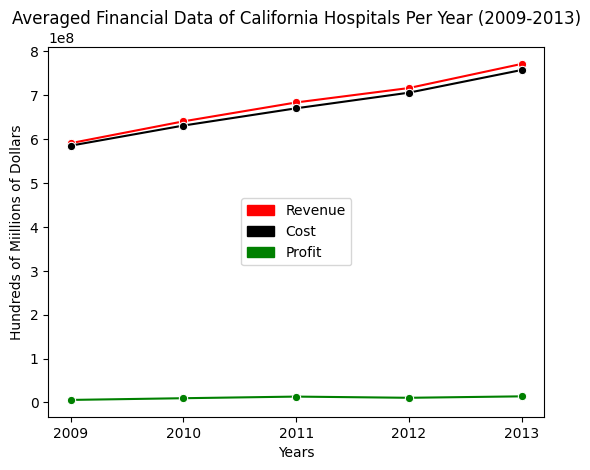

In [93]:
# Create custom legend via matplotlib (Must be done FIRST!!)

fig, ax = plt.subplots()
rev_line = mpatches.Patch(color = "red", label = "Revenue")
cost_line = mpatches.Patch(color = "black", label = "Cost")
profit_line = mpatches.Patch(color = "green", label = "Profit")
ax.legend(handles = [rev_line, cost_line, profit_line], loc = "center") # custom legend is added to graph

# Create graph data frame

graph_data = {"Year": ["2009", "2010", "2011", "2012", "2013"], 
               "Profit": [avg_profit_2009, avg_profit_2010, avg_profit_2011, avg_profit_2012, avg_profit_2013],
               "Revenue": [avg_revenue_2009, avg_revenue_2010, avg_revenue_2011, avg_revenue_2012, avg_revenue_2013],
               "Cost": [avg_cost_2009, avg_cost_2010, avg_cost_2011, avg_cost_2012, avg_cost_2013]}

df_data = pd.DataFrame(graph_data)

# Plot line graphs via seaborn

sns.lineplot(x = "Year", y = "Revenue", data = df_data, color = "red", marker = "o")
sns.lineplot(x = "Year", y = "Cost", data = df_data, color = "black", marker = "o")
sns.lineplot(x = "Year", y = "Profit", data = df_data, color = "green", marker = "o")

plt.title("Averaged Financial Data of California Hospitals Per Year (2009-2013)")
plt.xlabel("Years")
plt.ylabel("Hundreds of Miillions of Dollars")
plt.show()

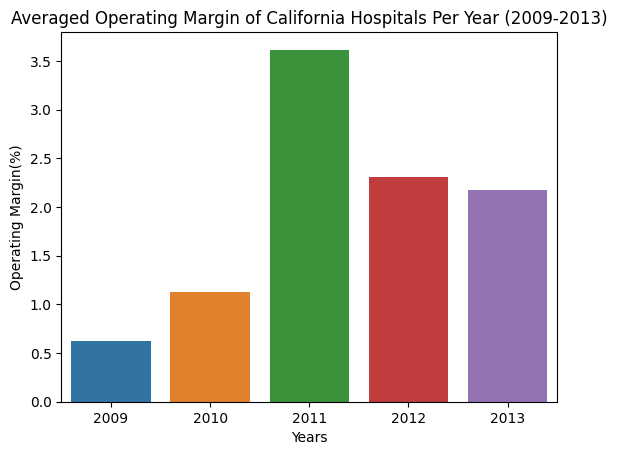

In [97]:
operating_margin = {"Year": ["2009", "2010", "2011", "2012", "2013"], 
                   "Operating Margin": [avg_oper_margin_2009, avg_oper_margin_2010, avg_oper_margin_2011, avg_oper_margin_2012, avg_oper_margin_2013]}

df_data_2 = pd.DataFrame(operating_margin)

sns.barplot(data = df_data_2, x = "Year", y = "Operating Margin")

plt.title("Averaged Operating Margin of California Hospitals Per Year (2009-2013)")
plt.xlabel("Years")
plt.ylabel("Operating Margin(%)")
plt.show()

In [13]:
statewide_2009 = df_2009.loc[df_2009["County Name"] == "Statewide"]
sw_2009_up = statewide_2009[["Income Statement Item", "Income Statement Amount"]].set_index("Income Statement Item")

rev_deduct = sw_2009_up.loc["DED_REV_PLUS_DSH", "Income Statement Amount"]
extra_item = sw_2009_up.loc["EXT_ITEM", "Income Statement Amount"]
gross_pat_rev = sw_2009_up.loc["GR_PT_REV", "Income Statement Amount"]
income_tax = sw_2009_up.loc["INC_TAX", "Income Statement Amount"]
non_oper_exp = sw_2009_up.loc["NONOP_EXP", "Income Statement Amount"]
non_oper_rev = sw_2009_up.loc["NONOP_REV", "Income Statement Amount"]
other_oper_rev = sw_2009_up.loc["OTH_OP_REV", "Income Statement Amount"]
total_oper_exp = sw_2009_up.loc["TOT_OP_EXP", "Income Statement Amount"]
total_cap_rev = sw_2009_up.loc["TOT_CAP_REV", "Income Statement Amount"]
net_revenue = sw_2009_up.loc["NET_REV_LESS_DSH", "Income Statement Amount"]
net_oper_rev = sw_2009_up.loc["NET_OP_LESS_DSH", "Income Statement Amount"]

revenue_2009 = gross_pat_rev + total_cap_rev + other_oper_rev + non_oper_rev
cost_2009 = rev_deduct + income_tax + non_oper_exp + total_oper_exp + extra_item
profit_2009 = revenue - cost

samples = (len(df_2009)-len(statewide_2009))/len(statewide_2009)

avg_revenue_2009 = revenue_2009/samples
avg_cost_2009 = cost_2009/samples
avg_profit_2009 = profit_2009/samples

print(revenue_2009)
print(cost_2009)
print(profit_2009)

print(avg_revenue_2009)
print(avg_cost_2009)
print(avg_profit_2009)


262742516506.0
260202125684.0
5969185328.0
590432621.3617978
584723877.941573
13413899.613483146


In [14]:
statewide_2010 = df_2010.loc[df_2010["County Name"] == "Statewide"]
sw_2010_up = statewide_2010[["Income Statement Item", "Income Statement Amount"]].set_index("Income Statement Item")

rev_deduct = mod_df_2010.loc["DED_REV_PLUS_DSH", "Income Statement Amount"]
extra_item = mod_df_2010.loc["EXT_ITEM", "Income Statement Amount"]
gross_pat_rev = mod_df_2010.loc["GR_PT_REV", "Income Statement Amount"]
income_tax = mod_df_2010.loc["INC_TAX", "Income Statement Amount"]
non_oper_exp = mod_df_2010.loc["NONOP_EXP", "Income Statement Amount"]
non_oper_rev = mod_df_2010.loc["NONOP_REV", "Income Statement Amount"]
other_oper_rev = mod_df_2010.loc["OTH_OP_REV", "Income Statement Amount"]
total_oper_exp = mod_df_2010.loc["TOT_OP_EXP", "Income Statement Amount"]
total_cap_rev = mod_df_2010.loc["TOT_CAP_REV", "Income Statement Amount"]
net_revenue = mod_df_2010.loc["NET_REV_LESS_DSH", "Income Statement Amount"]
net_oper_rev = mod_df_2010.loc["NET_OP_LESS_DSH", "Income Statement Amount"]

revenue_2010 = gross_pat_rev + total_cap_rev + other_oper_rev + non_oper_rev
cost_2010 = rev_deduct + income_tax + non_oper_exp + total_oper_exp + extra_item
profit_2010 = revenue - cost

samples = (len(df_2010)-len(statewide_2010))/len(statewide_2010)

avg_revenue_2010 = revenue_2010/samples
avg_cost_2010 = cost_2010/samples
avg_profit_2010 = profit_2010/samples

print(revenue_2010)
print(cost_2010)
print(profit_2010)

print(avg_revenue_2010)
print(avg_cost_2010)
print(avg_profit_2010)

281642761587.0
277421506626.0
5969185328.0
640097185.425
630503424.15
13566330.290909091


In [15]:
statewide_2011 = df_2011.loc[df_2011["County Name"] == "Statewide"]
sw_2011_up = statewide_2011[["Income Statement Item", "Income Statement Amount"]].set_index("Income Statement Item")

rev_deduct = mod_df_2011.loc["DED_REV_PLUS_DSH", "Income Statement Amount"]
extra_item = mod_df_2011.loc["EXT_ITEM", "Income Statement Amount"]
gross_pat_rev = mod_df_2011.loc["GR_PT_REV", "Income Statement Amount"]
income_tax = mod_df_2011.loc["INC_TAX", "Income Statement Amount"]
non_oper_exp = mod_df_2011.loc["NONOP_EXP", "Income Statement Amount"]
non_oper_rev = mod_df_2011.loc["NONOP_REV", "Income Statement Amount"]
other_oper_rev = mod_df_2011.loc["OTH_OP_REV", "Income Statement Amount"]
total_oper_exp = mod_df_2011.loc["TOT_OP_EXP", "Income Statement Amount"]
total_cap_rev = mod_df_2011.loc["TOT_CAP_REV", "Income Statement Amount"]
net_revenue = mod_df_2011.loc["NET_REV_LESS_DSH", "Income Statement Amount"]
net_oper_rev = mod_df_2011.loc["NET_OP_LESS_DSH", "Income Statement Amount"]

revenue_2011 = gross_pat_rev + total_cap_rev + other_oper_rev + non_oper_rev
cost_2011 = rev_deduct + income_tax + non_oper_exp + total_oper_exp + extra_item
profit_2011 = revenue - cost

samples = (len(df_2011)-len(statewide_2011))/len(statewide_2011)

avg_revenue_2011 = revenue_2011/samples
avg_cost_2011 = cost_2011/samples
avg_profit_2011 = profit_2011/samples

print(revenue_2011)
print(cost_2011)
print(profit_2011)

print(avg_revenue_2011)
print(avg_cost_2011)
print(avg_profit_2011)


300562881016.0
294719711451.0
5969185328.0
683097456.8545455
669817526.025
13566330.290909091


In [16]:
statewide_2012 = df_2012.loc[df_2012["County Name"] == "Statewide"]
sw_2012_up = statewide_2012[["Income Statement Item", "Income Statement Amount"]].set_index("Income Statement Item")

rev_deduct = mod_df_2012.loc["DED_REV_PLUS_DSH", "Income Statement Amount"]
extra_item = mod_df_2012.loc["EXT_ITEM", "Income Statement Amount"]
gross_pat_rev = mod_df_2012.loc["GR_PT_REV", "Income Statement Amount"]
income_tax = mod_df_2012.loc["INC_TAX", "Income Statement Amount"]
non_oper_exp = mod_df_2012.loc["NONOP_EXP", "Income Statement Amount"]
non_oper_rev = mod_df_2012.loc["NONOP_REV", "Income Statement Amount"]
other_oper_rev = mod_df_2012.loc["OTH_OP_REV", "Income Statement Amount"]
total_oper_exp = mod_df_2012.loc["TOT_OP_EXP", "Income Statement Amount"]
total_cap_rev = mod_df_2012.loc["TOT_CAP_REV", "Income Statement Amount"]
net_revenue = mod_df_2012.loc["NET_REV_LESS_DSH", "Income Statement Amount"]
net_oper_rev = mod_df_2012.loc["NET_OP_LESS_DSH", "Income Statement Amount"]

revenue_2012 = gross_pat_rev + total_cap_rev + other_oper_rev + non_oper_rev
cost_2012 = rev_deduct + income_tax + non_oper_exp + total_oper_exp + extra_item
profit_2012 = revenue - cost

samples = (len(df_2012)-len(statewide_2012))/len(statewide_2012)

avg_revenue_2012 = revenue_2012/samples
avg_cost_2012 = cost_2012/samples
avg_profit_2012 = profit_2012/samples

print(revenue_2012)
print(cost_2012)
print(profit_2012)

print(avg_revenue_2012)
print(avg_cost_2012)
print(avg_profit_2012)

315726062590.0
311070020214.0
5969185328.0
715932114.7165533
705374195.4965986
13535567.63718821


In [72]:
statewide_2013 = df_2013.loc[df_2013["County Name"] == "Statewide"]
sw_2013_up = statewide_2013[["Income Statement Item", "Income Statement Amount"]].set_index("Income Statement Item")

rev_deduct = mod_df_2013.loc["DED_REV_PLUS_DSH", "Income Statement Amount"]
extra_item = mod_df_2013.loc["EXT_ITEM", "Income Statement Amount"]
gross_pat_rev = mod_df_2013.loc["GR_PT_REV", "Income Statement Amount"]
income_tax = mod_df_2013.loc["INC_TAX", "Income Statement Amount"]
non_oper_exp = mod_df_2013.loc["NONOP_EXP", "Income Statement Amount"]
non_oper_rev = mod_df_2013.loc["NONOP_REV", "Income Statement Amount"]
other_oper_rev = mod_df_2013.loc["OTH_OP_REV", "Income Statement Amount"]
total_oper_exp = mod_df_2013.loc["TOT_OP_EXP", "Income Statement Amount"]
total_cap_rev = mod_df_2013.loc["TOT_CAP_REV", "Income Statement Amount"]
net_revenue = mod_df_2013.loc["NET_REV_LESS_DSH", "Income Statement Amount"]
net_oper_rev = mod_df_2013.loc["NET_OP_LESS_DSH", "Income Statement Amount"]

revenue_2013 = gross_pat_rev + total_cap_rev + other_oper_rev + non_oper_rev
cost_2013 = rev_deduct + income_tax + non_oper_exp + total_oper_exp + extra_item
profit_2013 = revenue - cost

samples = (len(df_2013)-len(statewide_2013))/len(statewide_2013)

avg_revenue_2013 = revenue_2013/samples
avg_cost_2013 = cost_2013/samples
avg_profit_2013 = profit_2013/samples

print(revenue_2013)
print(cost_2013)
print(profit_2013)

print(avg_revenue_2013)
print(avg_cost_2013)
print(avg_profit_2013)


332236035057.0
326266849729.0
4656042376.0
770849269.2737819
756999651.3433875
10802882.542923434


In [18]:
df_total_fin = pd.DataFrame({"Year" : ["2009", "2010", "2011", "2012", "2013"],
                             "Total Revenue" : [revenue_2009, revenue_2010, revenue_2011, revenue_2012, revenue_2013],
                             "Total Cost" : [cost_2009, cost_2010, cost_2011, cost_2012, cost_2013],
                             "Total Profit" : [profit_2009, profit_2010, profit_2011, profit_2012, profit_2013],
                             "Average Revenue" : [avg_revenue_2009, avg_revenue_2010, avg_revenue_2011, avg_revenue_2012, avg_revenue_2013],
                             "Average Cost" : [avg_cost_2009, avg_cost_2010, avg_cost_2011, avg_cost_2012, avg_cost_2013],
                             "Average Profit" : [avg_profit_2009, avg_profit_2010, avg_profit_2011, profit_2012, profit_2013]
})

df_total_fin.to_csv("total financial data.csv", index = False)

In [ ]:
df_2009.loc[156:169, "Income Statement Amount"]

Condensed 2009 Data

In [18]:
# net_revenue = gross_pat_rev - rev_deduct
# net_oper_rev = (net_revenue + other_oper_rev) - total_oper_exp
# net_income = (non_oper_rev + net_oper_rev) - non_oper_exp (total profit)
# op_mar = net_oper_rev/(net_revenue + other_oper_rev)


# Create another data frame with county info

# df = pd.DataFrame({"Year": [],
#                        "County Name" : [],
#                        "Type of Control" : [],
#                        "Total Revenue" : []
#                        "Total Cost" : [],
#                        "Total Profit" : [],
#                        "Operating Margin" : []
#     })

df_count_2009 = pd.DataFrame(columns=["Year", "County Name", "Type of Control", "Total Revenue", "Total Cost", "Total Profit", "Operating Margin"])

a =[]
b = 0

# used a "while loop" to increase elements by 13; to be used as indices to locate values in data frame; doesn't work for a "for loop"
while(b < int(len(df_2009))):  
    a.append(b)
    b += 13

for i in range(len(a)): 

    year = df_2009.loc[a[i], "Year"]
    county = df_2009.loc[a[i], "County Name"]
    control = df_2009.loc[a[i], "Type of Control"]

    gross_pat_rev_2009 = df_2009.loc[a[i], "Income Statement Amount"]
    rev_deduct_2009 = df_2009.loc[a[i]+1, "Income Statement Amount"]
    total_cap_rev_2009 = df_2009.loc[a[i]+2, "Income Statement Amount"]
    net_revenue_2009 = df_2009.loc[a[i]+3, "Income Statement Amount"]
    other_oper_rev_2009 = df_2009.loc[a[i]+4, "Income Statement Amount"]
    total_oper_exp_2009 = df_2009.loc[a[i]+5, "Income Statement Amount"]
    net_oper_rev_2009 = df_2009.loc[a[i]+6, "Income Statement Amount"]
    non_oper_rev_2009 = df_2009.loc[a[i]+7, "Income Statement Amount"]
    non_oper_exp_2009 = df_2009.loc[a[i]+8, "Income Statement Amount"]
    income_tax_2009 = df_2009.loc[a[i]+9, "Income Statement Amount"]
    extra_item_2009 = df_2009.loc[a[i]+10, "Income Statement Amount"]
    net_income_2009 = df_2009.loc[a[i]+11, "Income Statement Amount"]
    op_mar_2009 = df_2009.loc[a[i]+12, "Income Statement Amount"]


    revenue_2009 = gross_pat_rev_2009 + total_cap_rev_2009 + other_oper_rev_2009 + non_oper_rev_2009
    cost_2009 = rev_deduct_2009 + income_tax_2009 + non_oper_exp_2009 + total_oper_exp_2009 + extra_item_2009
    # profit_2009 = revenue - cost

    # data_to_add = [{"Year": year,
    #                 "County Name" : county,
    #                 "Type of Control" : control,
    #                 "Total Revenue" : revenue_2009,
    #                 "Total Cost" : cost_2009,
    #                 "Total Profit" : net_income,
    #                 "Operating Margin" : op_mar}]
    
    # for data in data_to_add:
    #     df = df.append(data_to_add, ignore_index=True)


    data_to_add = pd.DataFrame({"Year": year,
                    "County Name" : county,
                    "Type of Control" : control,
                    "Total Revenue" : revenue_2009,
                    "Total Cost" : cost_2009,
                    "Total Profit" : net_income_2009,
                    "Operating Margin" : op_mar_2009},
                    index = [a.index(a[i])]) # get index numbers of list

    i+=1

    frames = [df_count_2009, data_to_add] # create separate list of data frames to use with concatenate

    for data in data_to_add:
        df_count_2009 = pd.concat(frames, ignore_index=True)

df_count_2009 = df_count_2009.reset_index(drop=True)
df_count_2009

,Year,County Name,Type of Control,Total Revenue,Total Cost,Total Profit,Operating Margin
0,2009,Santa Clara,State,4.900944e+07,4.900944e+07,0.000000e+00,-5.47
1,2009,Orange,Investor,8.495085e+08,8.506502e+08,-1.141677e+06,-1.81
2,2009,Alameda,City/County,9.642089e+08,9.471902e+08,1.701875e+07,2.21
3,2009,Alameda,District,2.892915e+08,2.885612e+08,7.303070e+05,-8.78
4,2009,Los Angeles,Investor,2.465335e+08,2.441316e+08,2.401880e+06,3.68
...,...,...,...,...,...,...,...
441,2009,Orange,Investor,7.539199e+08,7.376475e+08,1.627238e+07,9.25
442,2009,Los Angeles,Non-Profit,1.471011e+09,1.448313e+09,2.269828e+07,3.59
443,2009,Los Angeles,Investor,5.304923e+08,5.279666e+08,2.525702e+06,2.83
444,2009,Yolo,Non-Profit,4.663958e+08,4.625970e+08,3.798832e+06,4.22


In [19]:
df_count_2009.to_csv("condensed hosp. data (2009).csv", index = False)

Condensed 2010 Data 

In [28]:
# net_revenue = gross_pat_rev - rev_deduct
# net_oper_rev = (net_revenue + other_oper_rev) - total_oper_exp
# net_income = (non_oper_rev + net_oper_rev) - non_oper_exp (total profit)
# op_mar = net_oper_rev/(net_revenue + other_oper_rev)


df_count_2010 = pd.DataFrame(columns=["Year", "County Name", "Type of Control", "Total Revenue", "Total Cost", "Total Profit", "Operating Margin"])

a =[]
b = 0

while(b < int(len(df_2010))):
    a.append(b)
    b += 13

for i in range(len(a)): 

    year = df_2010.loc[a[i], "Year"]
    county = df_2010.loc[a[i], "County Name"]
    control = df_2010.loc[a[i], "Type of Control"]

    gross_pat_rev_2010 = df_2010.loc[a[i], "Income Statement Amount"]
    rev_deduct_2010 = df_2010.loc[a[i]+1, "Income Statement Amount"]
    total_cap_rev_2010 = df_2010.loc[a[i]+2, "Income Statement Amount"]
    net_revenue_2010 = df_2010.loc[a[i]+3, "Income Statement Amount"]
    other_oper_rev_2010 = df_2010.loc[a[i]+4, "Income Statement Amount"]
    total_oper_exp_2010 = df_2010.loc[a[i]+5, "Income Statement Amount"]
    net_oper_rev_2010 = df_2010.loc[a[i]+6, "Income Statement Amount"]
    non_oper_rev_2010 = df_2010.loc[a[i]+7, "Income Statement Amount"]
    non_oper_exp_2010 = df_2010.loc[a[i]+8, "Income Statement Amount"]
    income_tax_2010 = df_2010.loc[a[i]+9, "Income Statement Amount"]
    extra_item_2010 = df_2010.loc[a[i]+10, "Income Statement Amount"]
    net_income_2010 = df_2010.loc[a[i]+11, "Income Statement Amount"]
    op_mar_2010 = df_2010.loc[a[i]+12, "Income Statement Amount"]

    revenue_2010 = gross_pat_rev_2010 + total_cap_rev_2010 + other_oper_rev_2010 + non_oper_rev_2010
    cost_2010 = rev_deduct_2010 + income_tax_2010 + non_oper_exp_2010 + total_oper_exp_2010 + extra_item_2010
    # profit_2010 = revenue - cost

    data_to_add = pd.DataFrame({"Year": year,
                    "County Name" : county,
                    "Type of Control" : control,
                    "Total Revenue" : revenue_2010,
                    "Total Cost" : cost_2010,
                    "Total Profit" : net_income_2010,
                    "Operating Margin" : op_mar_2010},
                    index = [a.index(a[i])]) # get index numbers of list

    i+=1

    frames = [df_count_2010, data_to_add] # create separate list of data frames to use with concatenate

    for data in data_to_add:
        df_count_2010 = pd.concat(frames, ignore_index=True)

df_count_2010 = df_count_2010.reset_index(drop=True)
df_count_2010



,Year,County Name,Type of Control,Total Revenue,Total Cost,Total Profit,Operating Margin
0,2010,Orange,Investor,1.004358e+09,1.002737e+09,1.621264e+06,0.88
1,2010,Alameda,City/County,1.011626e+09,9.880782e+08,2.354786e+07,3.68
2,2010,Alameda,District,2.746537e+08,2.852799e+08,2.016539e+06,-6.22
3,2010,Los Angeles,Investor,3.094788e+08,3.069904e+08,2.488456e+06,3.72
4,2010,Alameda,Non-Profit,2.268462e+09,2.160117e+09,1.083451e+08,15.29
...,...,...,...,...,...,...,...
436,2010,Orange,Investor,6.800332e+08,6.848366e+08,-4.803321e+06,-2.86
437,2010,Los Angeles,Non-Profit,1.606498e+09,1.574382e+09,3.211551e+07,5.41
438,2010,Los Angeles,Investor,5.912756e+08,5.868089e+08,4.466649e+06,4.62
439,2010,Yolo,Non-Profit,4.922484e+08,4.908431e+08,1.405258e+06,2.36


In [61]:
df_count_2010.to_csv("condensed hosp. data (2010).csv", index = False)

Condensed 2011 Data 

In [25]:
# net_revenue = gross_pat_rev - rev_deduct
# net_oper_rev = (net_revenue + other_oper_rev) - total_oper_exp
# net_income = (non_oper_rev + net_oper_rev) - non_oper_exp (total profit)
# op_mar = net_oper_rev/(net_revenue + other_oper_rev)


df_count_2011 = pd.DataFrame(columns=["Year", "County Name", "Type of Control", "Total Revenue", "Total Cost", "Total Profit", "Operating Margin"])

a =[]
b = 0

while(b < int(len(df_2011))):
    a.append(b)
    b += 13

for i in range(len(a)): 

    year = df_2011.loc[a[i], "Year"]
    county = df_2011.loc[a[i], "County Name"]
    control = df_2011.loc[a[i], "Type of Control"]

    gross_pat_rev_2011 = df_2011.loc[a[i], "Income Statement Amount"]
    rev_deduct_2011 = df_2011.loc[a[i]+1, "Income Statement Amount"]
    total_cap_rev_2011 = df_2011.loc[a[i]+2, "Income Statement Amount"]
    net_revenue_2011 = df_2011.loc[a[i]+3, "Income Statement Amount"]
    other_oper_rev_2011 = df_2011.loc[a[i]+4, "Income Statement Amount"]
    total_oper_exp_2011 = df_2011.loc[a[i]+5, "Income Statement Amount"]
    net_oper_rev_2011 = df_2011.loc[a[i]+6, "Income Statement Amount"]
    non_oper_rev_2011 = df_2011.loc[a[i]+7, "Income Statement Amount"]
    non_oper_exp_2011 = df_2011.loc[a[i]+8, "Income Statement Amount"]
    income_tax_2011 = df_2011.loc[a[i]+9, "Income Statement Amount"]
    extra_item_2011 = df_2011.loc[a[i]+10, "Income Statement Amount"]
    net_income_2011 = df_2011.loc[a[i]+11, "Income Statement Amount"]
    op_mar_2011 = df_2011.loc[a[i]+12, "Income Statement Amount"]

    revenue_2011 = gross_pat_rev_2011 + total_cap_rev_2011 + other_oper_rev_2011 + non_oper_rev_2011
    cost_2011 = rev_deduct_2011 + income_tax_2011 + non_oper_exp_2011 + total_oper_exp_2011 + extra_item_2011
    # profit_2011 = revenue - cost

    data_to_add = pd.DataFrame({"Year": year,
                    "County Name" : county,
                    "Type of Control" : control,
                    "Total Revenue" : revenue_2011,
                    "Total Cost" : cost_2011,
                    "Total Profit" : net_income_2011,
                    "Operating Margin" : op_mar_2011},
                    index = [a.index(a[i])]) # get index numbers of list

    i+=1

    frames = [df_count_2011, data_to_add] # create separate list of data frames to use with concatenate

    for data in data_to_add:
        df_count_2011 = pd.concat(frames, ignore_index=True)

df_count_2011 = df_count_2011.reset_index(drop=True)
df_count_2011

,Year,County Name,Type of Control,Total Revenue,Total Cost,Total Profit,Operating Margin
0,2011,Kings,Non-Profit,8.734563e+08,8.737495e+08,-2.931670e+05,-0.56
1,2011,Orange,Investor,1.198070e+09,1.193603e+09,4.467295e+06,2.21
2,2011,Alameda,City/County,1.110851e+09,9.948105e+08,1.160406e+08,-2.40
3,2011,Alameda,District,2.520854e+08,2.535143e+08,-1.428859e+06,-15.85
4,2011,Los Angeles,Investor,3.960800e+08,3.854825e+08,1.059747e+07,0.79
...,...,...,...,...,...,...,...
436,2011,Orange,Investor,6.993409e+08,6.705049e+08,2.883602e+07,14.81
437,2011,Los Angeles,Non-Profit,1.677100e+09,1.667738e+09,9.361561e+06,-1.71
438,2011,Los Angeles,Investor,6.320182e+08,6.147941e+08,1.737601e+07,15.46
439,2011,Yolo,Non-Profit,5.095913e+08,5.116791e+08,-2.087834e+06,-1.24


In [26]:
df_count_2011.to_csv("condensed hosp. data (2011).csv", index = False)

Condensed 2012 Data 

In [31]:
# net_revenue = gross_pat_rev - rev_deduct
# net_oper_rev = (net_revenue + other_oper_rev) - total_oper_exp
# net_income = (non_oper_rev + net_oper_rev) - non_oper_exp (total profit)
# op_mar = net_oper_rev/(net_revenue + other_oper_rev)


df_count_2012 = pd.DataFrame(columns=["Year", "County Name", "Type of Control", "Total Revenue", "Total Cost", "Total Profit", "Operating Margin"])

a =[]
b = 0

while(b < int(len(df_2012))):
    a.append(b)
    b += 13

for i in range(len(a)): 

    year = df_2012.loc[a[i], "Year"]
    county = df_2012.loc[a[i], "County Name"]
    control = df_2012.loc[a[i], "Type of Control"]

    gross_pat_rev_2012 = df_2012.loc[a[i], "Income Statement Amount"]
    rev_deduct_2012 = df_2012.loc[a[i]+1, "Income Statement Amount"]
    total_cap_rev_2012 = df_2012.loc[a[i]+2, "Income Statement Amount"]
    net_revenue_2012 = df_2012.loc[a[i]+3, "Income Statement Amount"]
    other_oper_rev_2012 = df_2012.loc[a[i]+4, "Income Statement Amount"]
    total_oper_exp_2012 = df_2012.loc[a[i]+5, "Income Statement Amount"]
    net_oper_rev_2012 = df_2012.loc[a[i]+6, "Income Statement Amount"]
    non_oper_rev_2012 = df_2012.loc[a[i]+7, "Income Statement Amount"]
    non_oper_exp_2012 = df_2012.loc[a[i]+8, "Income Statement Amount"]
    income_tax_2012 = df_2012.loc[a[i]+9, "Income Statement Amount"]
    extra_item_2012 = df_2012.loc[a[i]+10, "Income Statement Amount"]
    net_income_2012 = df_2012.loc[a[i]+11, "Income Statement Amount"]
    op_mar_2012 = df_2012.loc[a[i]+12, "Income Statement Amount"]

    revenue_2012 = gross_pat_rev_2012 + total_cap_rev_2012 + other_oper_rev_2012 + non_oper_rev_2012
    cost_2012 = rev_deduct_2012 + income_tax_2012 + non_oper_exp_2012 + total_oper_exp_2012 + extra_item_2012
    # profit_2012 = revenue - cost

    data_to_add = pd.DataFrame({"Year": year,
                    "County Name" : county,
                    "Type of Control" : control,
                    "Total Revenue" : revenue_2012,
                    "Total Cost" : cost_2012,
                    "Total Profit" : net_income_2012,
                    "Operating Margin" : op_mar_2012},
                    index = [a.index(a[i])]) # get index numbers of list

    i+=1

    frames = [df_count_2012, data_to_add] # create separate list of data frames to use with concatenate

    for data in data_to_add:
        df_count_2012 = pd.concat(frames, ignore_index=True)

df_count_2012 = df_count_2012.reset_index(drop=True)
df_count_2012

,Year,County Name,Type of Control,Total Revenue,Total Cost,Total Profit,Operating Margin
0,2012,Kings,Non-Profit,8.815574e+08,8.758414e+08,5.716031e+06,2.20
1,2012,Orange,Investor,1.387255e+09,1.388614e+09,-1.359227e+06,-1.29
2,2012,Alameda,City/County,1.183853e+09,1.106451e+09,7.740232e+07,-2.21
3,2012,Alameda,District,2.645391e+08,2.660321e+08,-1.492953e+06,-13.34
4,2012,Los Angeles,Investor,4.640035e+08,4.564672e+08,7.536259e+06,0.52
...,...,...,...,...,...,...,...
437,2012,Orange,Investor,6.990232e+08,6.996622e+08,-6.390160e+05,-0.36
438,2012,Los Angeles,Non-Profit,1.891230e+09,1.849158e+09,4.207177e+07,6.96
439,2012,Los Angeles,Investor,6.940522e+08,6.840239e+08,1.002836e+07,7.78
440,2012,Yolo,Non-Profit,5.303063e+08,5.246390e+08,5.667310e+06,5.28


In [32]:
df_count_2012.to_csv("condensed hosp. data (2012).csv", index = False)

Condensed 2013 Data 

In [40]:
# net_revenue = gross_pat_rev - rev_deduct
# net_oper_rev = (net_revenue + other_oper_rev) - total_oper_exp
# net_income = (non_oper_rev + net_oper_rev) - non_oper_exp (total profit)
# op_mar = net_oper_rev/(net_revenue + other_oper_rev)

df_count_2013 = pd.DataFrame(columns=["Year", "County Name", "Type of Control", "Total Revenue", "Total Cost", "Total Profit", "Operating Margin"])

a =[]
b = 0

while(b < int(len(df_2013))):
    a.append(b)
    b += 13

for i in range(len(a)): 

    year = df_2013.loc[a[i], "Year"]
    county = df_2013.loc[a[i], "County Name"]
    control = df_2013.loc[a[i], "Type of Control"]

    gross_pat_rev_2013 = df_2013.loc[a[i], "Income Statement Amount"]
    rev_deduct_2013 = df_2013.loc[a[i]+1, "Income Statement Amount"]
    total_cap_rev_2013 = df_2013.loc[a[i]+2, "Income Statement Amount"]
    net_revenue_2013 = df_2013.loc[a[i]+3, "Income Statement Amount"]
    other_oper_rev_2013 = df_2013.loc[a[i]+4, "Income Statement Amount"]
    total_oper_exp_2013 = df_2013.loc[a[i]+5, "Income Statement Amount"]
    net_oper_rev_2013 = df_2013.loc[a[i]+6, "Income Statement Amount"]
    non_oper_rev_2013 = df_2013.loc[a[i]+7, "Income Statement Amount"]
    non_oper_exp_2013 = df_2013.loc[a[i]+8, "Income Statement Amount"]
    income_tax_2013 = df_2013.loc[a[i]+9, "Income Statement Amount"]
    extra_item_2013 = df_2013.loc[a[i]+10, "Income Statement Amount"]
    net_income_2013 = df_2013.loc[a[i]+11, "Income Statement Amount"]
    op_mar_2013 = df_2013.loc[a[i]+12, "Income Statement Amount"]

    revenue_2013 = gross_pat_rev_2013 + total_cap_rev_2013 + other_oper_rev_2013 + non_oper_rev_2013
    cost_2013 = rev_deduct_2013 + income_tax_2013 + non_oper_exp_2013 + total_oper_exp_2013 + extra_item_2013
    # profit_2013 = revenue - cost

    data_to_add = pd.DataFrame({"Year": year,
                    "County Name" : county,
                    "Type of Control" : control,
                    "Total Revenue" : revenue_2013,
                    "Total Cost" : cost_2013,
                    "Total Profit" : net_income_2013,
                    "Operating Margin" : op_mar_2013},
                    index = [a.index(a[i])]) # get index numbers of list

    i+=1

    frames = [df_count_2013, data_to_add] # create separate list of data frames to use with concatenate

    for data in data_to_add:
        df_count_2013 = pd.concat(frames, ignore_index=True)

df_count_2013 = df_count_2013.reset_index(drop=True)
df_count_2013

,Year,County Name,Type of Control,Total Revenue,Total Cost,Total Profit,Operating Margin
0,2013,Fresno,Non-Profit,1.261535e+08,1.323339e+08,-6.180420e+06,-17.08
1,2013,Orange,Investor,1.444790e+09,1.443464e+09,1.325919e+06,-0.07
2,2013,Alameda,City/County,1.358233e+09,1.322318e+09,3.591582e+07,-10.60
3,2013,Alameda,District,3.213951e+08,3.237491e+08,-2.353989e+06,-11.61
4,2013,Los Angeles,Investor,4.940543e+08,4.676039e+08,2.645035e+07,5.79
...,...,...,...,...,...,...,...
427,2013,Orange,Investor,7.389070e+08,7.474170e+08,-8.509974e+06,-5.27
428,2013,Los Angeles,Non-Profit,1.897893e+09,1.865183e+09,3.271025e+07,4.98
429,2013,Los Angeles,Investor,7.166915e+08,7.064304e+08,1.026115e+07,9.43
430,2013,Yolo,Non-Profit,5.618348e+08,5.567866e+08,5.048258e+06,3.81


In [41]:
df_count_2013.to_csv("condensed hosp. data (2013).csv", index = False)

In [42]:
con_2009 = pd.read_csv("condensed hosp. data (2009).csv")
con_2010 = pd.read_csv("condensed hosp. data (2010).csv")
con_2011 = pd.read_csv("condensed hosp. data (2011).csv")
con_2012 = pd.read_csv("condensed hosp. data (2012).csv")
con_2013 = pd.read_csv("condensed hosp. data (2013).csv")

In [ ]:
sns.set_theme(style="darkgrid")
sns.relplot(data = con_2009, x = "Total Cost", y = "Total Profit", hue = "Type of Control" )
sns.relplot(data = con_2010, x = "Total Cost", y = "Total Profit", hue = "Type of Control" )
sns.relplot(data = con_2011, x = "Total Cost", y = "Total Profit", hue = "Type of Control" )
sns.relplot(data = con_2012, x = "Total Cost", y = "Total Profit", hue = "Type of Control" )
sns.relplot(data = con_2013, x = "Total Cost", y = "Total Profit", hue = "Type of Control" )

In [ ]:
con_2009.loc[con_2009["Type of Control"] == "City/County"]